In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv8 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, load_from_pkl=True, ablation=1000,
                                                          designated_ukc_cls=designated_ukc_cls)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100


In [4]:
# ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
#                                              test_data=test_data, pt_epochs=pt_epochs)

got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 15:51:36.725917
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3815 - accuracy: 0.8466 - precision: 0.9051 - recall: 0.7841
Epoch 1: val_accuracy improved from -inf to 0.99479, saving model to data\ptmodel_2022-04-25_15_51_36.725917\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_15_51_36.725917\assets
100/100 [==============================] - 11s 104ms/step - loss: 0.3815 - accuracy: 0.8466 - precision: 0.9051 - recall: 0.7841 - val_loss: 0.0236 - val_accuracy: 0.9948 - val_precision: 0.9948 - val_recall: 0.9948 - lr: 0.0010
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9784 - precision: 0.9794 - recall: 0.9784
Epoch 2: val_accuracy improved from 0.99479 to 0.99740, saving model to data\ptmodel_2022-04-25_15_51_36.725917\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_

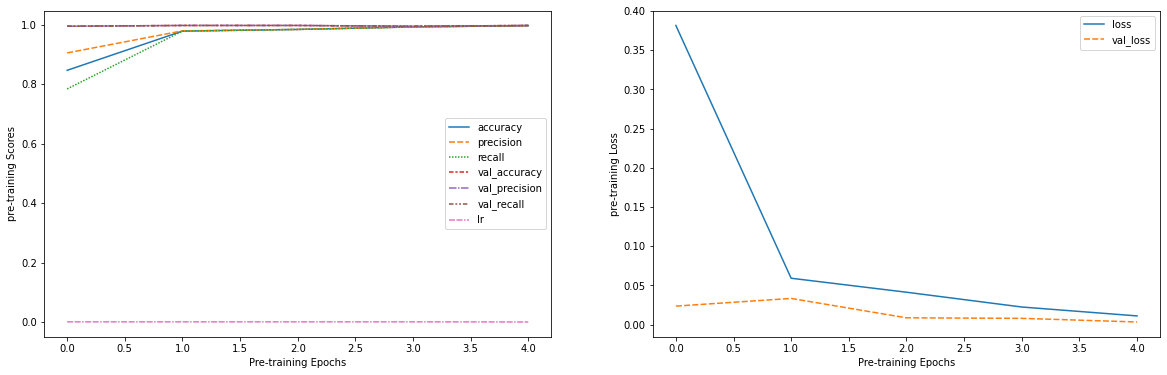

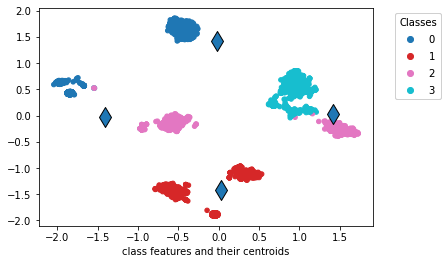

In [5]:
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog,
                                   #  ptmodel_get_mode='import',
                                   # ptmodel_path='data\ptmodel_2022-04-25_15_23_51.279812',
                                   )
# MyDev/OCLog/oclog/openset/notebooks/data/ptmodel_2022-04-25_14_37_41.671294

got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 15:53:57.955804
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.4006 - accuracy: 0.8206 - precision_2: 0.8607 - recall_2: 0.7725
Epoch 1: val_accuracy improved from -inf to 0.98438, saving model to data\ptmodel_2022-04-25_15_53_57.955804\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_15_53_57.955804\assets
100/100 [==============================] - 25s 246ms/step - loss: 0.4006 - accuracy: 0.8206 - precision_2: 0.8607 - recall_2: 0.7725 - val_loss: 0.0584 - val_accuracy: 0.9844 - val_precision_2: 0.9869 - val_recall_2: 0.9844 - lr: 0.0010
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9847 - precision_2: 0.9850 - recall_2: 0.9847
Epoch 2: val_accuracy did not improve from 0.98438
100/100 [==============================] - 24s 235ms/step - loss: 0.0431 - accuracy: 0.9847 - precision_2

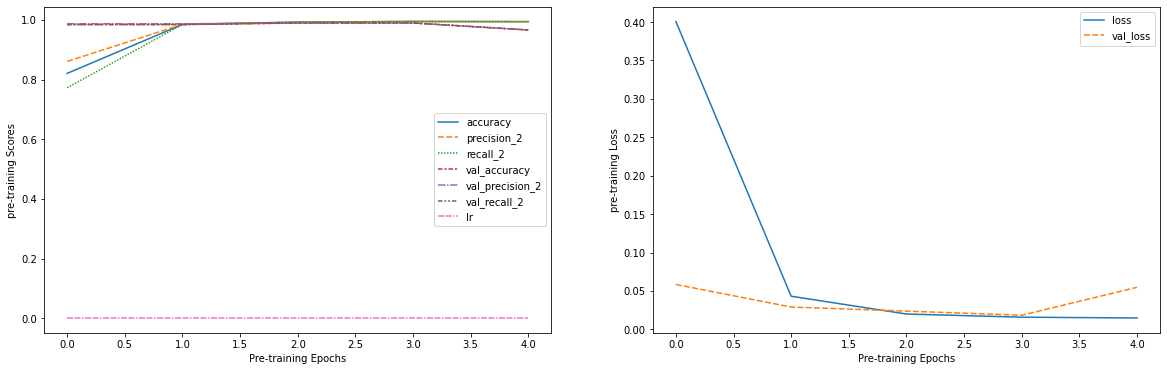

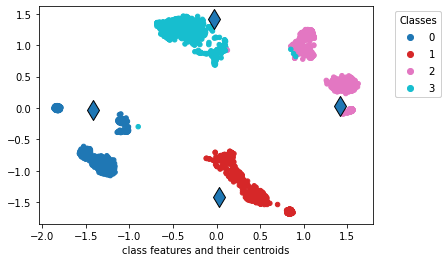

In [10]:
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 16:17:10.442676
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.8691 - precision_6: 0.9224 - recall_6: 0.8131
Epoch 1: val_accuracy improved from -inf to 0.98698, saving model to data\ptmodel_2022-04-25_16_17_10.442676\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_16_17_10.442676\assets
100/100 [==============================] - 11s 106ms/step - loss: 0.3153 -

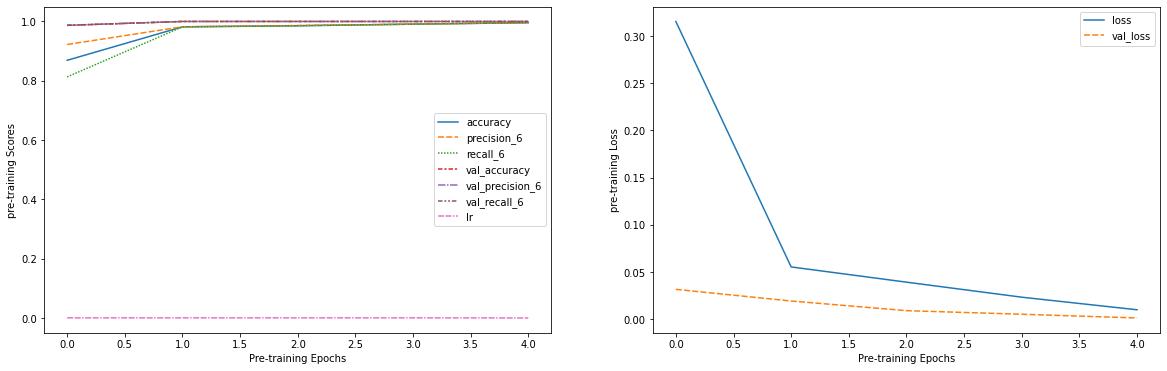

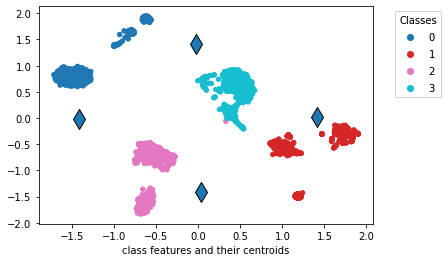

In [14]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           ablation=1000,
                                                           designated_ukc_cls=designated_ukc_cls, debug=False)

oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, )


padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 16:20:23.795281
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3658 - accuracy: 0.8356 - precision_7: 0.8831 - recall_7: 0.7887
Epoch 1: val_accuracy improved from -inf to 0.99219, saving model to data\ptmodel_2022-04-25_16_20_23.795281\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_16_20_23.795281\assets
100/100 [==============================] - 25s 249ms/step - loss: 

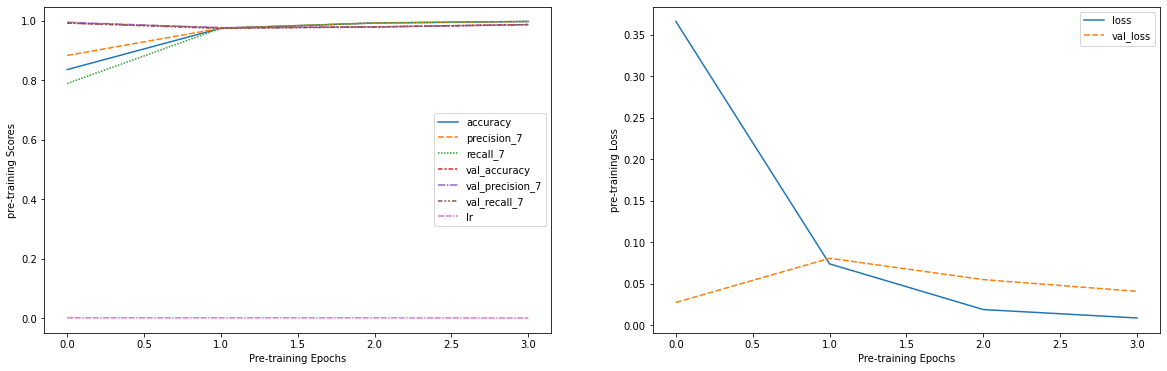

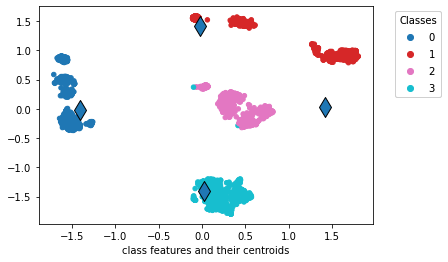

In [15]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True,                                                            
                                                           designated_ukc_cls=designated_ukc_cls, debug=False,
                                                           ablation=1000,
                                                           padded_char_len=176, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',)

oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, )